## Question 1

In [19]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde

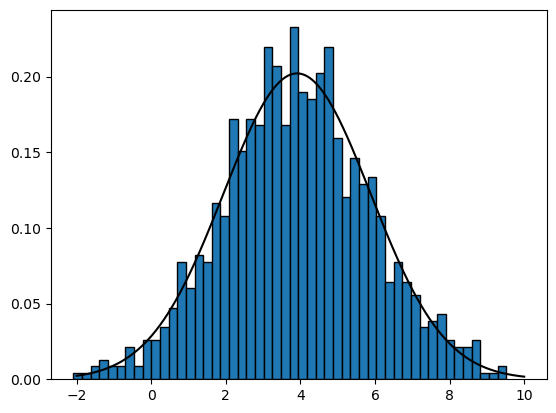

In [17]:
data = np.genfromtxt('problem_3_data.csv', delimiter=',')
mean = np.mean(data)
sig = np.std(data)
def gauss(sig, mean, x):
    return (1/(sig*np.sqrt(2*np.pi)))*np.exp(-(x-mean)**2/(2*sig**2))


x_values = np.linspace(-2, 10, 1000)
y_values = gauss(sig, mean, x_values)
plt.plot(x_values, y_values, color="black")

plt.hist(data, edgecolor='black', bins=50, density=True)  # 30 bins, black edges
plt.show()

## Question 2

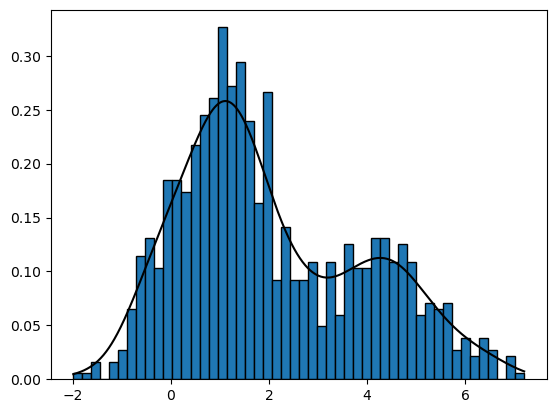

In [21]:
data = np.genfromtxt('problem_4_data.csv', delimiter=',')

kde_scipy = gaussian_kde(data)
x_values = np.linspace(data.min(), data.max(), 1000)
y_values = kde_scipy(x_values)
plt.plot(x_values, y_values, color="black")

plt.hist(data, edgecolor='black', bins=50, density=True)  # 30 bins, black edges
plt.show()

## Question 3


In [25]:
import autograd.numpy as np
from scipy.integrate import quad
x = np.array([0.0,2.0])
def g(x):
     return x**2 - 3*x + 4
    
result, error = quad(g, 0, 2)
result

4.666666666666666

In [28]:
x_samples = np.random.uniform(0, 2, 10000)
int = (2/10000) * np.sum(g(x_samples))
print(int)

4.638959404876547


In [29]:
def rejection_sampling(N):
    samples = []
    while len(samples) < N:
        x = np.random.uniform(0, 2)
        y = np.random.uniform(0, g(2))
        if y <= g(x): 
            samples.append(x)
    return np.array(samples)
s = rejection_sampling(10000)
int = (2/len(s)) * np.sum(g(s))
print(int)

4.697981413246245


In [30]:
print(np.mean(g(x_samples)/(1/2)))

4.638959404876546


## Question 4
#### Part 1


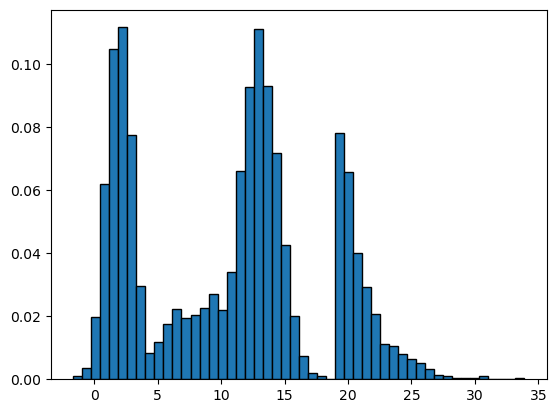

In [35]:
X = np.genfromtxt('complex_distribution.csv', delimiter=',')
N = len(X)
kde = gaussian_kde(X)
x_vals = np.linspace(X.min(), X.max(), 1000)
y_vals = kde(x_vals)
max = y_vals.max()
plt.hist(X, edgecolor='black', bins=50, density=True)
plt.show()

#### Part 2

In [36]:
x_hat = []
while len(x_hat) < 5000:
    x = np.random.uniform(X.min(), X.max())
    y = np.random.uniform(0, y_vals.max())
    if y <= kde(x):
        x_hat.append(x)
x_hat = np.array(x_hat)

In [38]:
x_bar = kde.resample(5000)[0]  

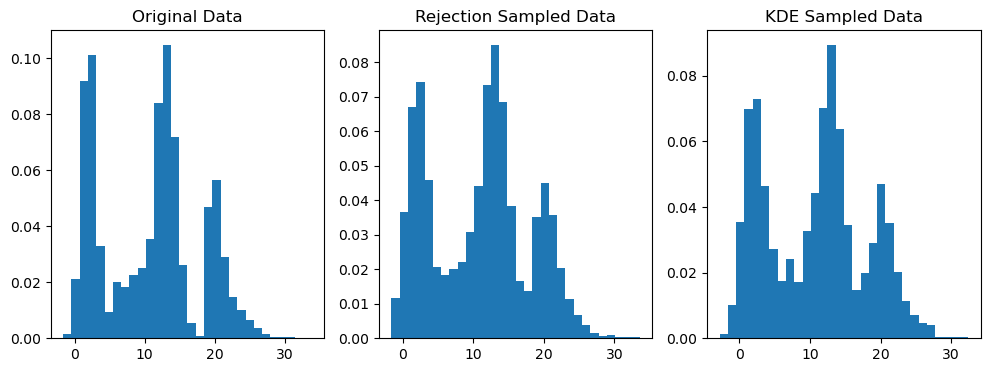

In [43]:
plt.figure(figsize=(12, 4))

plt.subplot(1, 3, 1)
plt.hist(X, bins=30, density=True)
plt.title("Original Data")

plt.subplot(1, 3, 2)
plt.hist(x_hat, bins=30, density=True)
plt.title("Rejection Sampled Data")

plt.subplot(1, 3, 3)
plt.hist(x_bar, bins=30, density=True)
plt.title("KDE Sampled Data")

plt.show()

#### Part 3

In [48]:
print("Expected value of X: ", X.mean())
print("Variance of X: ", np.var(X))
print("Expected of 3x+2: ", np.mean(3*X + 2))
print("Expected of 3x+2: ", np.mean(X**2 - 5*X))
print("Expected of 3x+2: ", np.mean(2*np.exp(X) + 1))

Expected value of X:  10.814000119911924
Variance of X:  49.40961360042826
Expected of 3x+2:  34.44200035973577
Expected of 3x+2:  112.28221159432371
Expected of 3x+2:  258969297984.54385


In [56]:
x_hat = np.array(x_hat)
print("Expected value of X: ", np.mean(x_hat))
print("Variance of X: ", np.var(x_hat))
print("Expected of 3x+2: ", np.mean(3*x_hat + 2))
print("Expected of 3x+2: ", np.mean(x_hat**2 - 5*x_hat))
print("Expected of 3x+2: ", np.mean(2*np.exp(x_hat) + 1))

Expected value of X:  10.908754971780812
Variance of X:  50.14750933604427
Expected of 3x+2:  34.72626491534244
Expected of 3x+2:  114.6046695114928
Expected of 3x+2:  298663941885.3306


In [55]:

print("Expected value of X: ", np.mean(x_bar))
print("Variance of X: ", np.var(x_bar))
print("Expected of 3x+2: ", np.mean(3*x_bar + 2))
print("Expected of 3x+2: ", np.mean(x_bar**2 - 5*x_bar))
print("Expected of 3x+2: ", np.mean(2*np.exp(x_bar) + 1))

Expected value of X:  10.812290206110216
Variance of X:  50.62157388226032
Expected of 3x+2:  34.43687061833065
Expected of 3x+2:  113.46574235285614
Expected of 3x+2:  110994622088.87204
